<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/1_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPU

In [12]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

Text(0, 0.5, 'y')

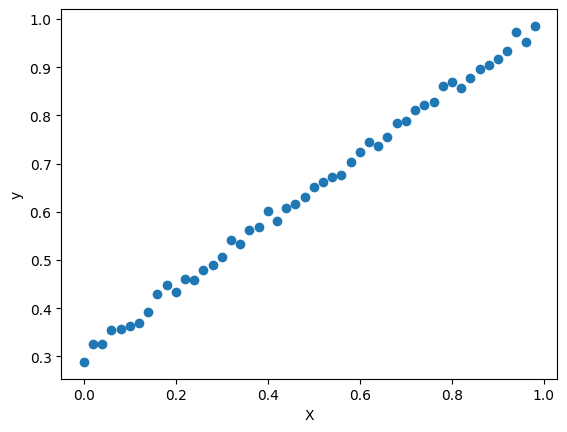

In [13]:
# prompt: we wanna do a simple regression task on torch, put weight and bias and add a normal noise to y and plot it

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.randn(X.shape) * 0.01
# y = weight * X + bias
# Plot the data
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')


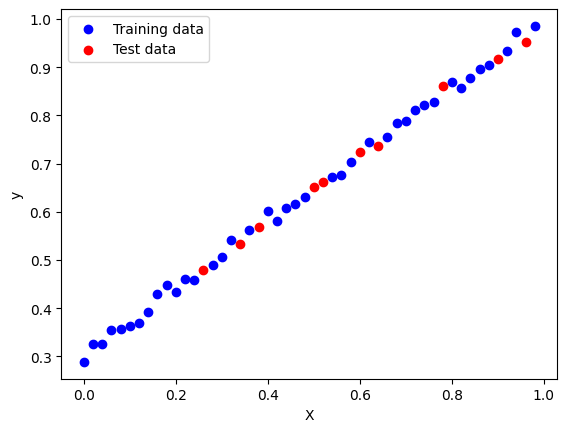

In [14]:
# prompt: split X and y into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Plot the training and test data separately
plt.scatter(X_train.numpy(), y_train.numpy(), c='blue', label='Training data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [15]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [16]:
model_2 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([-1.2717])), ('bias', tensor([0.0734]))])

In [17]:
# the main question
with torch.inference_mode():
    y_preds = model_0(X_test)


In [18]:
y_preds

tensor([[-0.2572],
        [-0.9185],
        [-0.6896],
        [-1.0711],
        [-0.3589],
        [-1.1474],
        [-0.5879],
        [-0.5624],
        [-0.7405],
        [-0.4098]])

In [19]:
y_test

tensor([[0.4794],
        [0.8620],
        [0.7236],
        [0.9167],
        [0.5332],
        [0.9519],
        [0.6621],
        [0.6516],
        [0.7363],
        [0.5690]])

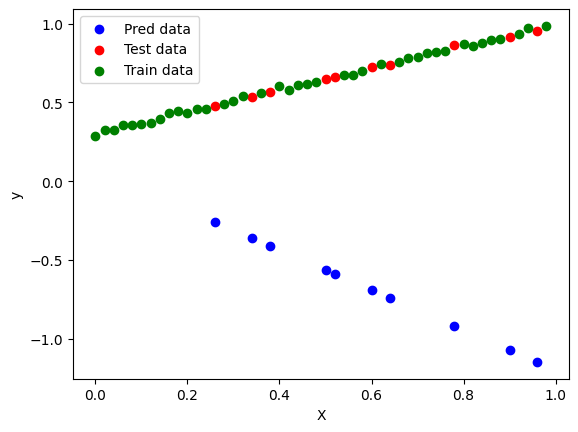

In [20]:
# prompt: scatter y_test and y_pred

# Plot the training and test data separately
plt.scatter(X_test.numpy(), y_preds.numpy(), c='blue', label='Pred data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')
plt.scatter(X_train.numpy(), y_train.numpy(), c='green', label='Train data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [21]:
%%time
import torch
from torch import nn
import torch.optim as optim

# Define the loss function (Mean Squared Error)
loss_fn = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent) with learning rate 0.01
optimizer = optim.SGD(model_0.parameters(), lr=0.01)

# Number of epochs (how many times to loop through the dataset)
epochs = 10000

# Training loop
for epoch in range(epochs):
    model_0.train()  # Set the model in training mode (affects things like dropout, though not used here)

    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model_0(X_train)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Backward pass: Compute gradients of the loss w.r.t. model parameters
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print some information every 100 epochs
    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# After training, print the final parameters (weights and bias)
print(f"Trained Weights: {model_0.weights.item()}, Trained Bias: {model_0.bias.item()}")


Epoch 1000/10000, Loss: 0.011240841820836067
Epoch 2000/10000, Loss: 0.0007394027197733521
Epoch 3000/10000, Loss: 0.00014749018009752035
Epoch 4000/10000, Loss: 0.00011412813182687387
Epoch 5000/10000, Loss: 0.00011224761692574248
Epoch 6000/10000, Loss: 0.00011214152618777007
Epoch 7000/10000, Loss: 0.0001121355890063569
Epoch 8000/10000, Loss: 0.00011213529796805233
Epoch 9000/10000, Loss: 0.00011213529796805233
Epoch 10000/10000, Loss: 0.00011213529796805233
Trained Weights: 0.6949640512466431, Trained Bias: 0.30234795808792114
CPU times: user 3.74 s, sys: 16.9 ms, total: 3.76 s
Wall time: 3.76 s


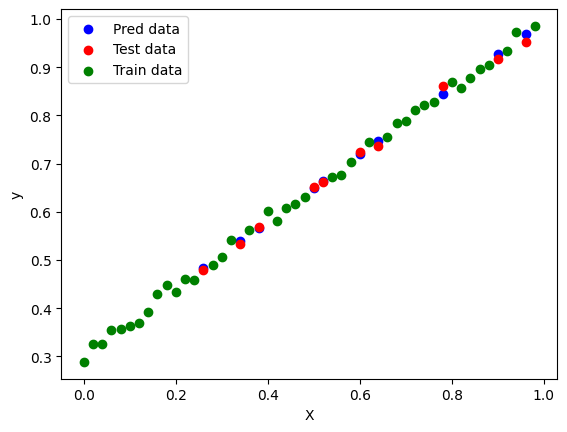

In [22]:
# prompt: scatter y_test and y_pred
y_preds = model_0(X_test)

# Plot the training and test data separately
plt.scatter(X_test.numpy(), y_preds.detach().numpy(), c='blue', label='Pred data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')
plt.scatter(X_train.numpy(), y_train.numpy(), c='green', label='Train data')


plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [34]:
%cd drive/MyDrive/Uni/AI/pytorch
!ls

[Errno 2] No such file or directory: 'drive/MyDrive/Uni/AI/pytorch'
/content/drive/MyDrive/Uni/AI/pytorch
0-basics.ipynb	1-workflow.ipynb


In [37]:
# prompt: save the state dict of model_0 inside in a file with .pth extension in the current directory

torch.save(model_0.state_dict(), 'model_0.pth')


In [38]:
!ls

0-basics.ipynb	1-workflow.ipynb  model_0.pth


<ipython-input-39-6a83d6c1f8d5>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load('model_0.pth'))


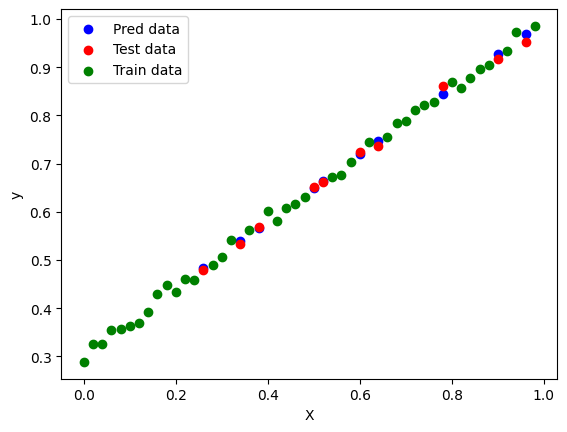

In [39]:
# prompt: instanciate another model and load the data of "model_0.pth" in it

# Create a new instance of the model
model_1 = LinearRegressionModel()

# Load the state dictionary from the saved file
model_1.load_state_dict(torch.load('model_0.pth'))

# Set the model to evaluation mode (important for things like dropout and batch normalization)
model_1.eval()
y_preds = model_1(X_test)

# Plot the training and test data separately
plt.scatter(X_test.numpy(), y_preds.detach().numpy(), c='blue', label='Pred data')
plt.scatter(X_test.numpy(), y_test.numpy(), c='red', label='Test data')
plt.scatter(X_train.numpy(), y_train.numpy(), c='green', label='Train data')


plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()




# GPU

In [16]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

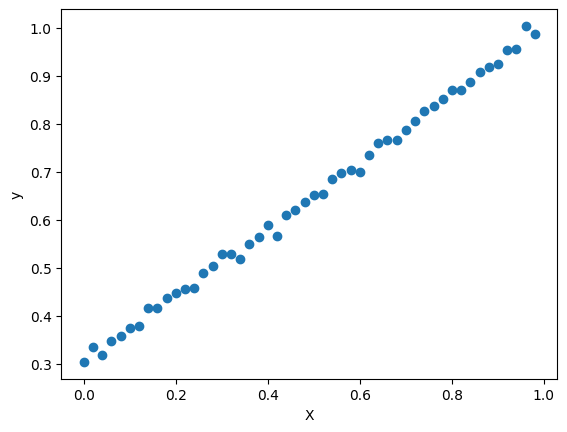

In [18]:
# prompt: we wanna do a simple regression task on torch, put weight and bias and add a normal noise to y and plot it

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.randn(X.shape) * 0.01
# y = weight * X + bias
# Plot the data
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')
X = X.to(device)
y = y.to(device)

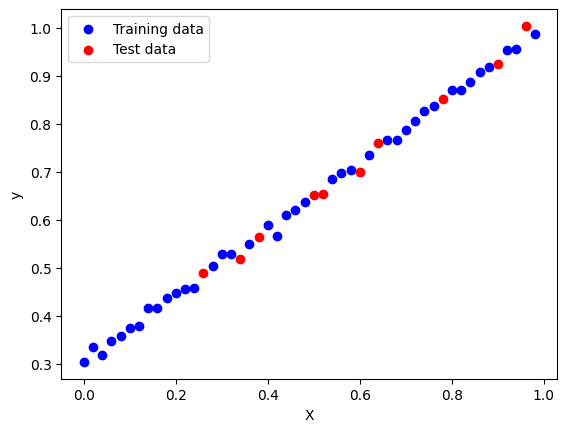

In [19]:
# prompt: split X and y into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Plot the training and test data separately
plt.scatter(X_train.cpu().numpy(), y_train.cpu().numpy(), c='blue', label='Training data')
plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), c='red', label='Test data')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [20]:
X_train.device

device(type='cuda', index=0)

In [21]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)

model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.0834]])),
              ('linear_layer.bias', tensor([0.1959]))]))

In [22]:
model_2.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_2.parameters())

Parameter containing:
tensor([[0.0834]], device='cuda:0', requires_grad=True)

In [23]:
%%time
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)



# Number of epochs (how many times to loop through the dataset)
epochs = 10000

# Training loop
for epoch in range(epochs):
    model_2.train()  # Set the model in training mode (affects things like dropout, though not used here)

    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model_2(X_train)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Backward pass: Compute gradients of the loss w.r.t. model parameters
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print some information every 100 epochs
    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# After training, print the final parameters (weights and bias)
print(f"Trained Weights: {model_2.state_dict}")


Epoch 1000/10000, Loss: 0.0010868285316973925
Epoch 2000/10000, Loss: 0.00012554731802083552
Epoch 3000/10000, Loss: 7.136545173125342e-05
Epoch 4000/10000, Loss: 6.83112521073781e-05
Epoch 5000/10000, Loss: 6.813903019065037e-05
Epoch 6000/10000, Loss: 6.812932406319305e-05
Epoch 7000/10000, Loss: 6.812877109041438e-05
Epoch 8000/10000, Loss: 6.812877109041438e-05
Epoch 9000/10000, Loss: 6.812877109041438e-05
Epoch 10000/10000, Loss: 6.812877109041438e-05
Trained Weights: <bound method Module.state_dict of LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)>
CPU times: user 6.29 s, sys: 277 ms, total: 6.57 s
Wall time: 6.85 s


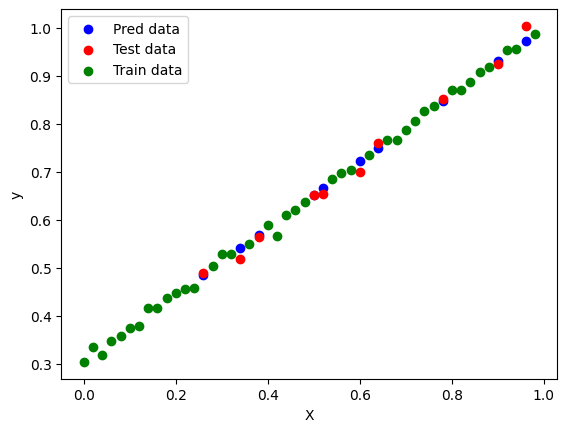

In [26]:
# prompt: scatter y_test and y_pred
y_preds = model_2(X_test)

# Plot the training and test data separately
plt.scatter(X_test.cpu().numpy(), y_preds.cpu().detach().numpy(), c='blue', label='Pred data')
plt.scatter(X_test.cpu().numpy(), y_test.cpu().numpy(), c='red', label='Test data')
plt.scatter(X_train.cpu().numpy(), y_train.cpu().numpy(), c='green', label='Train data')


plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()
